# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [285]:
def plot_feature_importance(importances, feature_names, top_n=10, title="Feature Importance"):
    """Рисует горизонтальную барную диаграмму важности признаков"""
    indices = np.argsort(np.abs(importances))[-top_n:]
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), np.abs(importances[indices]))
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Важность признака')
    plt.title(title)
    plt.tight_layout()
    plt.show()

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [286]:
# Загружаем обработанные данные из предыдущего упражнения
df = pd.read_csv('../ex02/data/dayofweek.csv')
print(f"Загружены данные: {df.shape}")
df.head()

Загружены данные: (1686, 44)


,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek
0,-0.788667,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,-0.756764,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
2,-0.724861,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
3,-0.692958,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,-0.661055,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4


In [287]:
# Подготавливаем X и y
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']
feature_names = X.columns.tolist()

print(f"Признаки: {X.shape[1]}")
print(f"Наблюдения: {X.shape[0]}")

Признаки: 43
Наблюдения: 1686


In [288]:
# Проверяем исходное распределение классов
print("📊 Исходное распределение дней недели:")
days_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
for day, count in y.value_counts().sort_index().items():
    percentage = count / len(y) * 100
    print(f"{days_names[day]} ({day}): {count} ({percentage:.1f}%)")

📊 Исходное распределение дней недели:
Пн (0): 136 (8.1%)
Вт (1): 274 (16.3%)
Ср (2): 149 (8.8%)
Чт (3): 396 (23.5%)
Пт (4): 104 (6.2%)
Сб (5): 271 (16.1%)
Вс (6): 356 (21.1%)


### ================================================================
### РАЗДЕЛЕНИЕ БЕЗ СТРАТИФИКАЦИИ
### ================================================================

In [289]:
print("🔴 Разделение БЕЗ стратификации:")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

print("\n📊 Распределение в TRAIN наборе:")
for day, count in y_train.value_counts().sort_index().items():
    percentage = count / len(y_train) * 100
    print(f"{days_names[day]}: {count} ({percentage:.1f}%)")

print("\n📊 Распределение в TEST наборе:")
for day, count in y_test.value_counts().sort_index().items():
    percentage = count / len(y_test) * 100
    print(f"{days_names[day]}: {count} ({percentage:.1f}%)")

🔴 Разделение БЕЗ стратификации:
Train set: (1348, 43)
Test set: (338, 43)

📊 Распределение в TRAIN наборе:
Пн: 105 (7.8%)
Вт: 222 (16.5%)
Ср: 125 (9.3%)
Чт: 313 (23.2%)
Пт: 80 (5.9%)
Сб: 216 (16.0%)
Вс: 287 (21.3%)

📊 Распределение в TEST наборе:
Пн: 31 (9.2%)
Вт: 52 (15.4%)
Ср: 24 (7.1%)
Чт: 83 (24.6%)
Пт: 24 (7.1%)
Сб: 55 (16.3%)
Вс: 69 (20.4%)


### ================================================================
### РАЗДЕЛЕНИЕ СО СТРАТИФИКАЦИЕЙ
### ================================================================

In [290]:
print("🟢 Разделение СО стратификацией:")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

print("\n📊 Распределение в TRAIN наборе (stratified):")
for day, count in y_train.value_counts().sort_index().items():
    percentage = count / len(y_train) * 100
    print(f"{days_names[day]}: {count} ({percentage:.1f}%)")

print("\n📊 Распределение в TEST наборе (stratified):")
for day, count in y_test.value_counts().sort_index().items():
    percentage = count / len(y_test) * 100
    print(f"{days_names[day]}: {count} ({percentage:.1f}%)")

🟢 Разделение СО стратификацией:
Train set: (1348, 43)
Test set: (338, 43)

📊 Распределение в TRAIN наборе (stratified):
Пн: 109 (8.1%)
Вт: 219 (16.2%)
Ср: 119 (8.8%)
Чт: 316 (23.4%)
Пт: 83 (6.2%)
Сб: 217 (16.1%)
Вс: 285 (21.1%)

📊 Распределение в TEST наборе (stratified):
Пн: 27 (8.0%)
Вт: 55 (16.3%)
Ср: 30 (8.9%)
Чт: 80 (23.7%)
Пт: 21 (6.2%)
Сб: 54 (16.0%)
Вс: 71 (21.0%)


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

In [291]:
# Результаты из предыдущего упражнения для сравнения
previous_results = {
    "LogisticRegression": 0.62158956109134042,
    "SVC_linear": 0.702846975088968, 
    "DecisionTree_4": 0.5516014234875445,
    "RandomForest_100_25": 1
}

current_results = {}

### a. Logreg

In [ ]:
logreg = LogisticRegression(random_state=21, fit_intercept=False, solver='sag')
logreg.fit(X_train, y_train)

# Предсказания на тестовом наборе
logreg_pred = logreg.predict(X_test)
logreg_test_accuracy = accuracy_score(y_test, logreg_pred)

# Для сравнения - точность на тренировочном наборе (переобучение)
logreg_train_pred = logreg.predict(X_train)
logreg_train_accuracy = accuracy_score(y_train, logreg_train_pred)
                                       
current_results["LogisticRegression"] = logreg_test_accuracy

print(f"📈 Train accuracy: {logreg_train_accuracy}")
print(f"📉 Test accuracy:  {logreg_test_accuracy}")
print(f"🔍 Разница (переобучение): {logreg_train_accuracy - logreg_test_accuracy}")


📈 Train accuracy: 0.6439169139465876
📉 Test accuracy:  0.6272189349112426
🔍 Разница (переобучение): 0.01669797903534498


### b. SVM

In [ ]:
svm = SVC(kernel='linear', random_state=21) 
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_pred)

svm_train_pred = svm.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)

current_results["SVC_linear"] = svm_test_accuracy

print(f"📈 Train accuracy: {svm_train_accuracy}")
print(f"📉 Test accuracy:  {svm_test_accuracy}")
print(f"🔍 Разница (переобучение): {svm_train_accuracy - svm_test_accuracy}")


📈 Train accuracy: 0.6891691394658753
📉 Test accuracy:  0.7159763313609467
🔍 Разница (переобучение): -0.026807191895071414


### c. Decision tree

In [296]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)
tree_test_accuracy = accuracy_score(y_test, tree_pred)

tree_train_pred = tree.predict(X_train)
tree_train_accuracy = accuracy_score(y_train, tree_train_pred)

current_results["DecisionTree_4"] = tree_test_accuracy

print(f"📈 Train accuracy: {tree_train_accuracy}")
print(f"📉 Test accuracy:  {tree_test_accuracy}")
print(f"🔍 Разница (переобучение): {tree_train_accuracy - tree_test_accuracy}")


📈 Train accuracy: 0.5326409495548962
📉 Test accuracy:  0.5295857988165681
🔍 Разница (переобучение): 0.003055150738328072


### d. Random forest

In [297]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_pred)

rf_train_pred = rf.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)

current_results["RandomForest_100_25"] = rf_test_accuracy

print(f"📈 Train accuracy: {rf_train_accuracy}")
print(f"📉 Test accuracy:  {rf_test_accuracy}")
print(f"🔍 Разница (переобучение): {rf_train_accuracy - rf_test_accuracy}")


📈 Train accuracy: 1.0
📉 Test accuracy:  0.9289940828402367
🔍 Разница (переобучение): 0.07100591715976334


In [298]:
print("📊 СРАВНЕНИЕ: Ex02 vs Ex03 (честное тестирование)")
print("="*50)
print("⚠️ В Ex02 мы тестировали на тех же данных, что обучали!")
print("✅ В Ex03 тестируем на отдельных данных")
print("\nМодель\t\t\tEx03 Test Accuracy\tEx02 Train Accuracy\tDiff")
print("-"*100)
for model, accuracy in current_results.items():
    print(f"{model:<20}\t{accuracy}\t{previous_results[model]}\t{'\t\t' if model=='RandomForest_100_25' else ''}{accuracy-previous_results[model]}")



📊 СРАВНЕНИЕ: Ex02 vs Ex03 (честное тестирование)
⚠️ В Ex02 мы тестировали на тех же данных, что обучали!
✅ В Ex03 тестируем на отдельных данных

Модель			Ex03 Test Accuracy	Ex02 Train Accuracy	Diff
----------------------------------------------------------------------------------------------------
LogisticRegression  	0.6272189349112426	0.6215895610913404	0.005629373819902139
SVC_linear          	0.7159763313609467	0.702846975088968	0.013129356271978754
DecisionTree_4      	0.5295857988165681	0.5516014234875445	-0.022015624670976397
RandomForest_100_25 	0.9289940828402367	1			-0.07100591715976334


## Вопрос 1: Which one has the largest difference comparing the current exercise and the previous? 
### Ответ: Random forest

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

```Кросс-валидация - это техника для более надёжной оценки качества модели. Проблема обычного train/test split в том, что результат может зависеть от того, как "повезло" с разбиением данных.```

Здесь в кв:
- Каждое наблюдение используется для тестирования ровно 1 раз
- Каждое наблюдение используется для обучения 9 раз
- Получаем 10 независимых оценок качества

### a. Logreg

In [299]:
logreg_cv = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
logreg_scores = cross_val_score(logreg_cv, X_train, y_train, cv=10, scoring='accuracy')

print(f"📊 CV Scores: {logreg_scores}")
print(f"📈 Mean CV Accuracy: {logreg_scores.mean():.4f}")
print(f"📏 Std CV Accuracy:  {logreg_scores.std():.4f}")
print(f"🎯 95% Confidence Interval: [{logreg_scores.mean() - 2*logreg_scores.std():.4f}, {logreg_scores.mean() + 2*logreg_scores.std():.4f}]")


📊 CV Scores: [0.56296296 0.61481481 0.59259259 0.60740741 0.55555556 0.57777778
 0.61481481 0.53333333 0.58208955 0.57462687]
📈 Mean CV Accuracy: 0.5816
📏 Std CV Accuracy:  0.0253
🎯 95% Confidence Interval: [0.5310, 0.6322]


Анализ:

🟡 Средняя производительность - чуть лучше случайного выбора

✅ Стабильная - низкое стандартное отклонение (2.53%)

📊 Разброс от 53.3% до 61.5% - не очень впечатляет

### b. SVM

In [300]:
svm_cv = SVC(kernel='linear', random_state=21)
svm_scores = cross_val_score(svm_cv, X_train, y_train, cv=10, scoring='accuracy')

print(f"📊 CV Scores: {svm_scores}")
print(f"📈 Mean CV Accuracy: {svm_scores.mean():.4f}")
print(f"📏 Std CV Accuracy:  {svm_scores.std():.4f}")
print(f"🎯 95% Confidence Interval: [{svm_scores.mean() - 2*svm_scores.std():.4f}, {svm_scores.mean() + 2*svm_scores.std():.4f}]")


📊 CV Scores: [0.65925926 0.75555556 0.62222222 0.65185185 0.65185185 0.64444444
 0.72592593 0.62222222 0.61940299 0.63432836]
📈 Mean CV Accuracy: 0.6587
📏 Std CV Accuracy:  0.0436
🎯 95% Confidence Interval: [0.5715, 0.7459]


Анализ:

🟢 Хорошая производительность - заметно лучше LogReg

⚠️ Менее стабильная - более высокое std (4.36%)

📊 Большой разброс: от 61.9% до 75.6%

🎯 Есть фолды где работает очень хорошо (75.6%), есть где хуже

### c. Decision tree

In [301]:
tree_cv = DecisionTreeClassifier(max_depth=4, random_state=21)
tree_scores = cross_val_score(tree_cv, X_train, y_train, cv=10, scoring='accuracy')

print(f"📊 CV Scores: {tree_scores}")
print(f"📈 Mean CV Accuracy: {tree_scores.mean():.4f}")
print(f"📏 Std CV Accuracy:  {tree_scores.std():.4f}")
print(f"🎯 95% Confidence Interval: [{tree_scores.mean() - 2*tree_scores.std():.4f}, {tree_scores.mean() + 2*tree_scores.std():.4f}]")

📊 CV Scores: [0.48148148 0.52592593 0.47407407 0.52592593 0.57037037 0.51111111
 0.5037037  0.48888889 0.54477612 0.46268657]
📈 Mean CV Accuracy: 0.5089
📏 Std CV Accuracy:  0.0319
🎯 95% Confidence Interval: [0.4451, 0.5727]


Анализ:

🔴 Худшая производительность - практически на уровне случайного выбора

✅ Относительно стабильная

⚠️ Переобучение - дерево глубины 4 может быть слишком простым

📊 Почти все фолды показывают посредственные результаты

### d. Random forest

In [302]:
rf_cv = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf_scores = cross_val_score(rf_cv, X_train, y_train, cv=10, scoring='accuracy')

print(f"📊 CV Scores: {rf_scores}")
print(f"📈 Mean CV Accuracy: {rf_scores.mean():.4f}")
print(f"📏 Std CV Accuracy:  {rf_scores.std():.4f}")
print(f"🎯 95% Confidence Interval: [{rf_scores.mean() - 2*rf_scores.std():.4f}, {rf_scores.mean() + 2*rf_scores.std():.4f}]")

📊 CV Scores: [0.9037037  0.96296296 0.8962963  0.94074074 0.91851852 0.8962963
 0.92592593 0.8962963  0.93283582 0.90298507]
📈 Mean CV Accuracy: 0.9177
📏 Std CV Accuracy:  0.0216
🎯 95% Confidence Interval: [0.8745, 0.9608]


Анализ:

🏆 ОТЛИЧНАЯ производительность - 91.77%!

⭐ ОЧЕНЬ стабильная - самое низкое std (2.16%)

🎯 Все фолды хорошие - даже худший результат 89.6%

✅ Узкий доверительный интервал - высокая надёжность

## Вопрос 2: 
### Ответ: c

## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

## Оптимизируем RandomForestClassifier (лучшая финальная модель)

In [303]:
# Подбор параметров через кросс-валидацию
best_score = 0
best_params = {}

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, 25, 30],
    'max_features': ['sqrt', 'log2', None]
}

print("🔍 Поиск лучших параметров...")
for n_est in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        for features in param_grid['max_features']:
            rf_temp = RandomForestClassifier(
                n_estimators=n_est, 
                max_depth=depth, 
                max_features=features,
                random_state=21
            )
            
            scores = cross_val_score(rf_temp, X_train, y_train, cv=5, scoring='accuracy')
            mean_score = scores.mean()
            
            if mean_score > best_score:
                best_score = mean_score
                best_params = {
                    'n_estimators': n_est,
                    'max_depth': depth, 
                    'max_features': features
                }
                
            print(f"n_est={n_est}, depth={depth}, features={features}: {mean_score:.4f}")

print(f"\n🎯 Лучшие параметры: {best_params}")
print(f"🏆 Лучший CV score: {best_score:.4f}")

🔍 Поиск лучших параметров...
n_est=50, depth=10, features=sqrt: 0.8026
n_est=50, depth=10, features=log2: 0.8138
n_est=50, depth=10, features=None: 0.8093
n_est=50, depth=15, features=sqrt: 0.8783
n_est=50, depth=15, features=log2: 0.8783
n_est=50, depth=15, features=None: 0.8731
n_est=50, depth=20, features=sqrt: 0.8917
n_est=50, depth=20, features=log2: 0.8984
n_est=50, depth=20, features=None: 0.8939
n_est=50, depth=25, features=sqrt: 0.8984
n_est=50, depth=25, features=log2: 0.8969
n_est=50, depth=25, features=None: 0.8954
n_est=50, depth=30, features=sqrt: 0.8998
n_est=50, depth=30, features=log2: 0.9021
n_est=50, depth=30, features=None: 0.8954
n_est=100, depth=10, features=sqrt: 0.8093
n_est=100, depth=10, features=log2: 0.8123
n_est=100, depth=10, features=None: 0.8130
n_est=100, depth=15, features=sqrt: 0.8783
n_est=100, depth=15, features=log2: 0.8768
n_est=100, depth=15, features=None: 0.8798
n_est=100, depth=20, features=sqrt: 0.8954
n_est=100, depth=20, features=log2: 0.89

In [ ]:
print("🚀 Обучение финальной модели...")
final_model = RandomForestClassifier(**best_params, random_state=21)
final_model.fit(X_train, y_train)

# Тестирование финальной модели
final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_pred)

print(f"✅ Финальная точность на тесте: {final_accuracy:.4f}")


🚀 Обучение финальной модели...
✅ Финальная точность на тесте: 0.9320


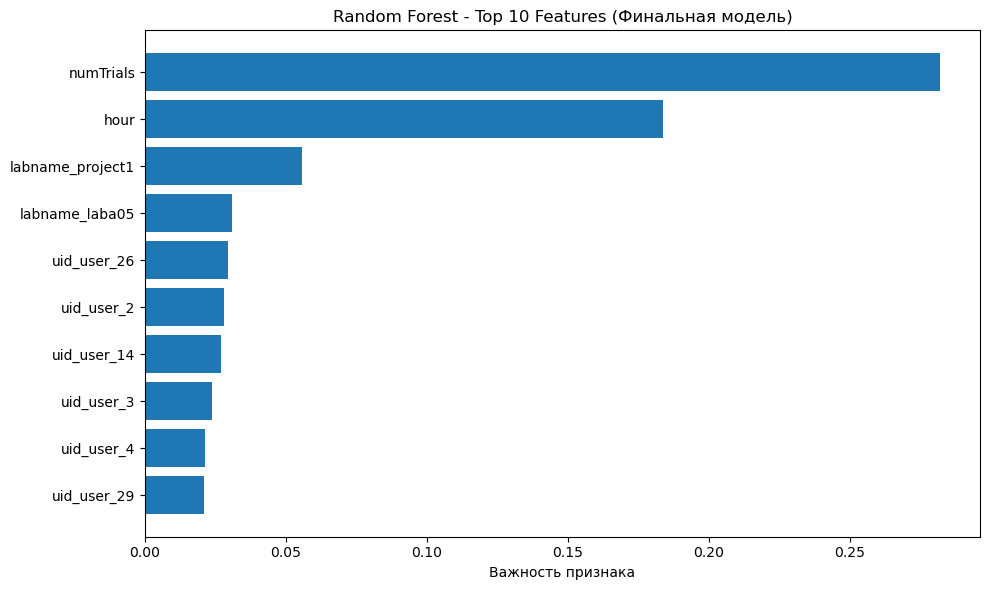

In [ ]:
feature_importance = final_model.feature_importances_
plot_feature_importance(feature_importance, feature_names, 
                       title="Random Forest - Top 10 Features (Финальная модель)")

# # Топ-10 важных признаков
# top_features_idx = np.argsort(feature_importance)[-10:]
# print("\n🔝 Топ-10 важных признаков:")
# for i, idx in enumerate(reversed(top_features_idx)):
#     print(f"{i+1:2d}. {feature_names[idx]:<30} : {feature_importance[idx]:.4f}")

In [ ]:
print("💾 Сохранение модели...")
model_filename = 'models/best_dayofweek_classifier.joblib'

# Создаём папку если её нет
import os
os.makedirs('models', exist_ok=True)

# Сохраняем модель
joblib.dump(final_model, model_filename)
print(f"✅ Модель сохранена: {model_filename}")

# Загружаем модель
print(f"\n📂 Загрузка модели...")
loaded_model = joblib.load(model_filename)

# Проверяем, что загруженная модель работает
loaded_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_pred)

print(f"✅ Точность загруженной модели: {loaded_accuracy:.4f}")
print(f"🔍 Модели идентичны: {np.array_equal(final_pred, loaded_pred)}")


💾 Сохранение модели...
✅ Модель сохранена: models/best_dayofweek_classifier.joblib

📂 Загрузка модели...
✅ Точность загруженной модели: 0.9320
🔍 Модели идентичны: True
